# Assignment 1

### Problem Description
Create a word-document matrix (A) from a text dataset. If the vocabulary (set of unique words) size is M and the number of documents is N, then the size of this matrix will be M X N. Use numpy data structures to create and manipulate this matrix.

### Dataset
This dataset has 20 short text files. The data is available here Download here.

### Output
    1. Show the matrix A: report M and N

    2. Visualize the matrix: Use heatmap like visualization to display the word-document matrix (higher frequency should be denoted by a darker shade)

    3. Using the matrix compute TF-IDF (Links to an external site.) scores for each word

    4. Using cosine similarity (Links to an external site.) find the 3 most similar documents of "10.txt"

    5. Using matrix manipulation and numpy create a new matrix B of size N X N, where Bij will represent the number of common words between document i and j. Note: the diagonal of B should always have the highest value

In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
data_location = os.path.join('C:\\', 'Users', 'prane', 'OneDrive', 'Desktop', '3rd sem', 'Deep Learning', 'Assignment1_data', 'Assignment1_data', '*.txt')


files = glob.glob(data_location)
print(len(files))

20


In [65]:
import string as s
print(s.punctuation)

def punctuation(lines):
    for b in s.punctuation:
        lines = lines.replace(b, " ")
    return lines

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [66]:
def preprocessing(l):
    st = ""
    new_l = []
    for i in l:
        st = re.sub("[^A-Za-z]+", " ", i)
        if st != ' ' and len(st.strip()) > 1:
            new_l.append(st.lower())
    return new_l

In [67]:
emp = []
new = []

for f in files:
    outfile = open(f,'r')
    data = outfile.read()
    data = punctuation(data)
    emp.append(data.split())
outfile.close()        
emp[0]
for i in emp:
    new.append(np.array(preprocessing(i)))

for i, arr in enumerate(new):
    print(f"Length of array {i}: {len(arr)}")

max_len = max(len(arr) for arr in new)

# Pad the arrays to have the same length
new_padded = np.array([np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in new])

# Concatonating array rows, axis = 0
con = np.concatenate(new_padded)

# Concatonating array rows, axis = 0
con = np.concatenate(new)
# Extracting unique words to form vocabulary
vocabulary = np.unique(con)

A = []

for i in new:
    freq = np.zeros(len(vocabulary))
    for j in i:
        freq[np.where(vocabulary == j)] += 1
    A.append(freq)
    
A = np.array(A)
A = A.T

print(f"Ans. 1) \nMatrix A [M X N]:\n{A}\n")
print(f"Value of M: {A.shape[0]}")
print(f"Value of N: {A.shape[1]}")


Length of array 0: 88
Length of array 1: 132
Length of array 2: 122
Length of array 3: 118
Length of array 4: 172
Length of array 5: 152
Length of array 6: 154
Length of array 7: 128
Length of array 8: 134
Length of array 9: 140
Length of array 10: 136
Length of array 11: 111
Length of array 12: 130
Length of array 13: 242
Length of array 14: 160
Length of array 15: 107
Length of array 16: 122
Length of array 17: 224
Length of array 18: 132
Length of array 19: 146
Ans. 1) 
Matrix A [M X N]:
[[0. 0. 0. ... 2. 0. 0.]
 [0. 2. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Value of M: 1112
Value of N: 20


Text(50.722222222222214, 0.5, 'Words (M)')

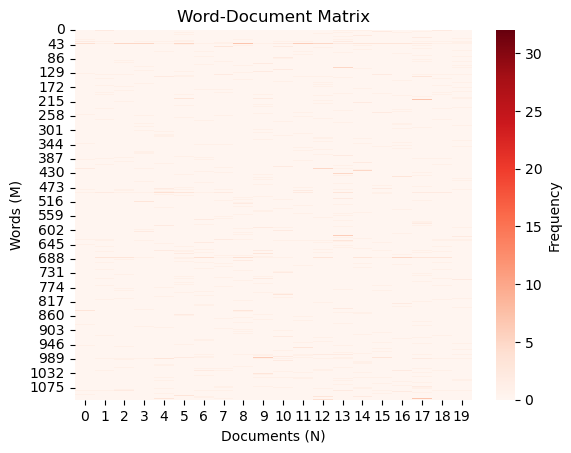

In [68]:
sns.heatmap(A, cmap='Reds', cbar_kws={'label': 'Frequency'})
plt.title('Word-Document Matrix')
plt.xlabel('Documents (N)')
plt.ylabel('Words (M)')

In [69]:
trans = TfidfTransformer()
tfidf_matrix = trans.fit_transform(A)

# Convert to NumPy array for better visualization
tfidf_array = tfidf_matrix.toarray()

print(f"TF-IDF Matrix:\n", tfidf_array)

TF-IDF Matrix:
 [[0.         0.         0.         ... 0.85802918 0.         0.        ]
 [0.         0.6427875  0.         ... 0.         0.6427875  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [70]:
#4
dot_prod = np.dot(tfidf_array.T, tfidf_array[:,9])
norm_prod = np.linalg.norm(tfidf_array, axis = 0) * np.linalg.norm(tfidf_array[:,9])
#cosine similarity = dot(a,b)/(norm(a) * norm(b))
cos_sim = dot_prod/norm_prod
print("Documents: ", np.argsort(cos_sim)[-4:-1][::-1])
print("Similar numbers", np.sort(cos_sim)[-4:-1][::-1])

Documents:  [ 5  1 18]
Similar numbers [0.17960704 0.07415627 0.07415627]


In [71]:
#5
B = []
for i in A.T:
    minimum = []
    for j in A.T:
        minimum.append(np.sum(np.minimum(i,j)))
        
    B.append(minimum)
    
B = np.array(B)
print("In Matrix B, each Bij denotes the no.of common words between document i and document j.\n\n", B)

In Matrix B, each Bij denotes the no.of common words between document i and document j.

 [[ 88.  23.  27.  24.  26.  29.  26.  23.  34.  16.  25.  21.  20.  34.
   25.  30.  21.  27.  23.  27.]
 [ 23. 132.  35.  22.  41.  43.  33.  35.  23.  33.  32.  25.  26.  28.
   30.  25.  22.  40. 132.  31.]
 [ 27.  35. 122.  23.  28.  29.  35.  31.  25.  23.  32.  22.  31.  35.
   28.  30.  27.  31.  35.  32.]
 [ 24.  22.  23. 118.  27.  25.  21.  23.  25.  15.  25.  21.  25.  29.
   21.  22.  21.  26.  22.  24.]
 [ 26.  41.  28.  27. 172.  42.  34.  35.  23.  27.  37.  30.  24.  36.
   35.  27.  22.  52.  41.  36.]
 [ 29.  43.  29.  25.  42. 152.  30.  29.  27.  57.  32.  31.  29.  32.
   28.  27.  25.  43.  43.  33.]
 [ 26.  33.  35.  21.  34.  30. 154.  36.  31.  26.  34.  29.  37.  42.
   33.  33.  28.  40.  33.  41.]
 [ 23.  35.  31.  23.  35.  29.  36. 128.  27.  24.  34.  22.  29.  36.
   35.  28.  24.  47.  35.  35.]
 [ 34.  23.  25.  25.  23.  27.  31.  27. 134.  21.  28.  24.  34.  38

# References

https://education.molssi.org/python_scripting_cms/03-multiple_files/index.html

https://stackoverflow.com/questions/43182472/process-multiple-files-in-python-with-one-code

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://memgraph.com/blog/cosine-similarity-python-scikit-learn